In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -U numpy
!{sys.executable} -m pip install -U matplotlib

In [270]:
# Hash utilities
import zlib
from collections import Counter as count  
from string import printable  

# Create Hash Function
def crc32_hash_function(user_id: str) -> str:
    """Take string, even if its integer convert first to string"""
    return zlib.crc32(user_id.encode("utf-8"))

# Convert from str to hexadecimal
def to_hex(crc32encoded: str) -> hex:
    return hex(crc32encoded & 0xffffffff)

# Perform hash function to each item
def distribute(items, num_containers, hash_function = hash):  
    return count([hash_function(item) % num_containers for item in items])  

# Cli plotting
def plot(histogram):  
    for key in sorted(histogram):  
        count1 = histogram[key]  
        padding = (max(histogram.values()) - count1) * " "  
        print(f"{key:3} {'■' * count1}{padding} ({count1})")  

def plot_first_last(histogram):  
    length = len(histogram)
    for idx, key in enumerate(sorted(histogram)):  
        if idx == 0 or idx == 1 or idx == length-2 or idx == length-1:
            count1 = histogram[key]  
            padding = (max(histogram.values()) - count1) * " "  
            print(f"{key:3} {'■' * count1}{padding} ({count1})")  

print("Python normal hash function. 5 bins.")
plot(distribute(printable, num_containers=5))  

print("CRC32 hash function. 5 bins.")
plot(distribute(printable, num_containers=5, hash_function=crc32_hash_function))  

Python normal hash function. 5 bins.
  0 ■■■■■■■■■■■■■■■■■         (17)
  1 ■■■■■■■■■■■■■■■■■■■■■     (21)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■ (25)
  3 ■■■■■■■■■■■■■■■■■■■■■     (21)
  4 ■■■■■■■■■■■■■■■■          (16)
CRC32 hash function. 5 bins.
  0 ■■■■■■■■■■■■■■■             (15)
  1 ■■■■■■■■■■■■■■■■■■■■        (20)
  2 ■■■■■■■■■■■■■■■■■■■         (19)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  4 ■■■■■■■■■■■■■■■■■■■         (19)


In [241]:
# low number test cases
test_cases = [
[str(uuid.uuid4().int) for i in range(10)],   
[str(uuid.uuid4().int) for i in range(100)], 
[str(uuid.uuid4().int) for i in range(1000)] 
]

# Up to 10% of MAUs as bins
num_bins = [5, 10, 20]

# Plot Normal hash function
print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case #{idx}  Number of Bins: {bin_size}  Number of Elements: {len(val)}")
        plot(distribute(val, num_containers=bin_size))  


Python hash function results for random UUIDs
Case #0  Number of Bins: 5  Number of Elements: 10
  0 ■■■  (3)
  1 ■■■■ (4)
  2 ■    (1)
  3 ■■   (2)
Case #0  Number of Bins: 10  Number of Elements: 10
  0 ■■  (2)
  1 ■■■ (3)
  5 ■   (1)
  6 ■   (1)
  7 ■   (1)
  8 ■■  (2)
Case #0  Number of Bins: 20  Number of Elements: 10
  1 ■  (1)
  6 ■  (1)
  8 ■  (1)
 10 ■■ (2)
 11 ■■ (2)
 15 ■  (1)
 17 ■  (1)
 18 ■  (1)
Case #1  Number of Bins: 5  Number of Elements: 100
  0 ■■■■■■■■■■■■■■■■           (16)
  1 ■■■■■■■■■■■■■■■■■■         (18)
  2 ■■■■■■■■■■■■■■■■■■■■■■■    (23)
  3 ■■■■■■■■■■■■■■■■■          (17)
  4 ■■■■■■■■■■■■■■■■■■■■■■■■■■ (26)
Case #1  Number of Bins: 10  Number of Elements: 100
  0 ■■■■■            (5)
  1 ■■■■■■■■■■       (10)
  2 ■■■■■■■■■        (9)
  3 ■■■■■■■■         (8)
  4 ■■■■■■■■■■■■■■■■ (16)
  5 ■■■■■■■■■■■      (11)
  6 ■■■■■■■■         (8)
  7 ■■■■■■■■■■■■■■   (14)
  8 ■■■■■■■■■        (9)
  9 ■■■■■■■■■■       (10)
Case #1  Number of Bins: 20  Number of Elements

In [268]:
# Plot crc32 function
print("Python crc32 function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case {idx}: Number of Bins: {bin_size}")
        plot(distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))  


Python crc32 function results for random UUIDs
Case 0: Number of Bins: 5
  0 ■    (1)
  1 ■■■■ (4)
  2 ■■   (2)
  3 ■■   (2)
  4 ■    (1)
Case 0: Number of Bins: 10
  1 ■■ (2)
  2 ■  (1)
  3 ■  (1)
  4 ■  (1)
  5 ■  (1)
  6 ■■ (2)
  7 ■  (1)
  8 ■  (1)
Case 0: Number of Bins: 20
  2 ■  (1)
  4 ■  (1)
  5 ■  (1)
  6 ■  (1)
  8 ■  (1)
 11 ■■ (2)
 13 ■  (1)
 16 ■  (1)
 17 ■  (1)
Case 1: Number of Bins: 5
  0 ■■■■■■■■■■■■■■■■■■          (18)
  1 ■■■■■■■■■■■■■■■■■■■■■       (21)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  3 ■■■■■■■■■■■■■               (13)
  4 ■■■■■■■■■■■■■■■■■■■■■       (21)
Case 1: Number of Bins: 10
  0 ■■■■■■■■■■         (10)
  1 ■■■■■■■■■■■■■■■    (15)
  2 ■■■■■■■■■■■■■■■■■■ (18)
  3 ■■■■■■■            (7)
  4 ■■■■■■■■■■■        (11)
  5 ■■■■■■■■           (8)
  6 ■■■■■■             (6)
  7 ■■■■■■■■■          (9)
  8 ■■■■■■             (6)
  9 ■■■■■■■■■■         (10)
Case 1: Number of Bins: 20
  0 ■          (1)
  1 ■■■■■■■■■  (9)
  2 ■■■■■■■■■■ (10)
  3 ■■         (2)
  4 

Python hash function results for random UUIDs
  0 ■    (1)
  1 ■■■■ (4)
  2 ■■   (2)
  3 ■■   (2)
  4 ■    (1)
['0x849112d9', '0xa84f4208', '0x3e31361f', '0x75190a72', '0x83f378dd', '0xf17dcfec', '0x87a0a62e', '0xa381b99c', '0x72fd6375', '0x5bc659f3']
Distribute counts:  Counter({1: 4, 2: 2, 3: 2, 0: 1, 4: 1})
Even distribution counts:  [2, 2, 2, 2, 2]


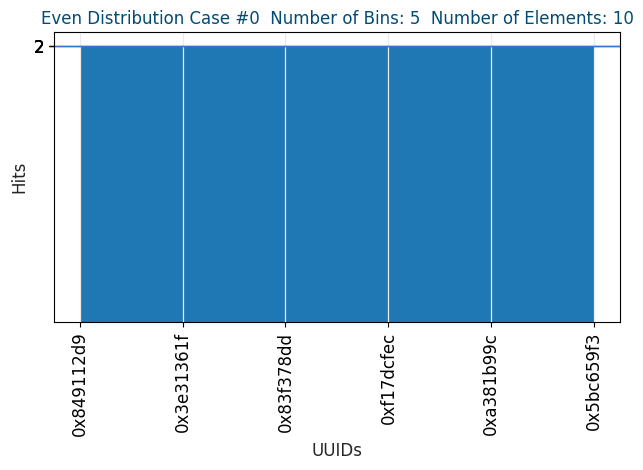

CRC32 distribution counts:  [1. 1. 1. 1. 1.]


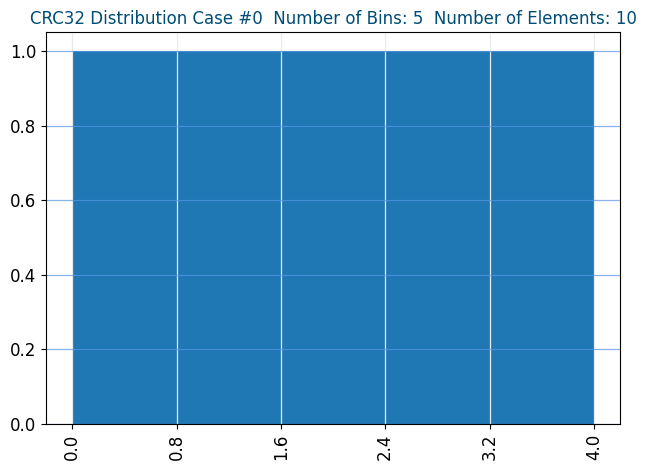

  1 ■■ (2)
  2 ■  (1)
  3 ■  (1)
  4 ■  (1)
  5 ■  (1)
  6 ■■ (2)
  7 ■  (1)
  8 ■  (1)
['0x849112d9', '0xa84f4208', '0x3e31361f', '0x75190a72', '0x83f378dd', '0xf17dcfec', '0x87a0a62e', '0xa381b99c', '0x72fd6375', '0x5bc659f3']
Distribute counts:  Counter({6: 2, 1: 2, 7: 1, 5: 1, 4: 1, 2: 1, 8: 1, 3: 1})
Even distribution counts:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


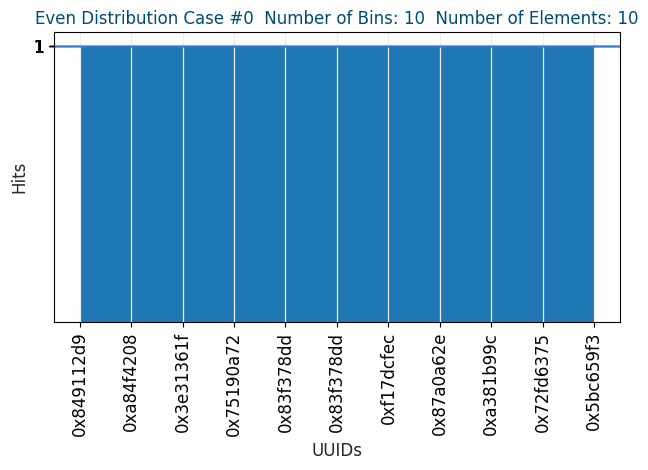

CRC32 distribution counts:  [1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]


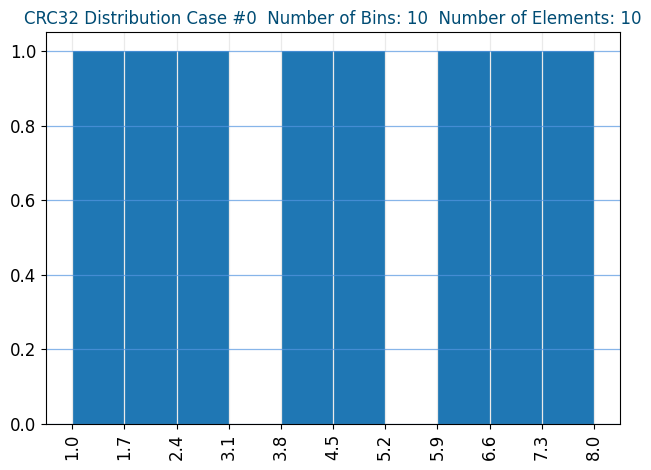

  2 ■  (1)
  4 ■  (1)
  5 ■  (1)
  6 ■  (1)
  8 ■  (1)
 11 ■■ (2)
 13 ■  (1)
 16 ■  (1)
 17 ■  (1)
['0x849112d9', '0xa84f4208', '0x3e31361f', '0x75190a72', '0x83f378dd', '0xf17dcfec', '0x87a0a62e', '0xa381b99c', '0x72fd6375', '0x5bc659f3']
Distribute counts:  Counter({11: 2, 17: 1, 16: 1, 6: 1, 5: 1, 4: 1, 2: 1, 8: 1, 13: 1})
Even distribution counts:  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


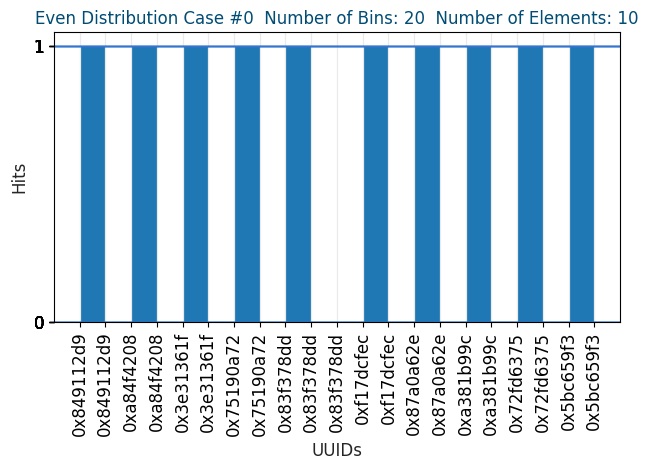

CRC32 distribution counts:  [1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.]


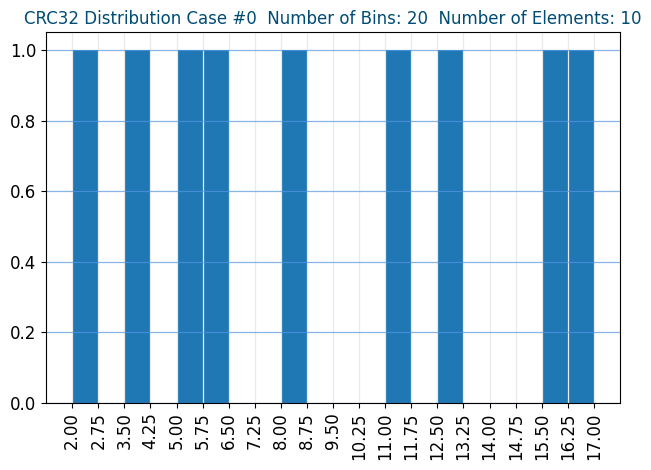

  0 ■■■■■■■■■■■■■■■■■■          (18)
  1 ■■■■■■■■■■■■■■■■■■■■■       (21)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  3 ■■■■■■■■■■■■■               (13)
  4 ■■■■■■■■■■■■■■■■■■■■■       (21)
['0x57950346', '0x65413f8e', '0xd1373b27', '0x49d16156', '0x7611d7b5', '0xda4d1625', '0x9ae87b85', '0xd3eea6dd', '0x80ab94a4', '0xea2647a0', '0x494a4a69', '0xa8002dfb', '0x12bdb76e', '0x172928cf', '0xb4b6fa7', '0x7a2fa339', '0xd2ad5722', '0x4c0a60a1', '0x425ffe16', '0x4c41651e', '0x7021b387', '0x96c17b94', '0xf3d6f4d7', '0xd3ccff15', '0x22c79435', '0xd71879fb', '0x63e90f33', '0x184a688a', '0xb9fb9097', '0x7b240447', '0xcd54d909', '0x44181793', '0x2557ba8a', '0xdbf213c0', '0x2db16910', '0xfecb160', '0x1545c2f0', '0x1c235021', '0xfd065f93', '0x2b3c7e0d', '0xd4cfcc1e', '0xf2363df3', '0xf8d97c1e', '0x3b5d922a', '0x676165c5', '0xb9fa003a', '0x3269a8b3', '0x1364d488', '0x3ba2eeaf', '0x805b7e8d', '0x3c3d30ff', '0xbc746a05', '0x2f2ba399', '0x9a7e0cca', '0xd93619ec', '0xdcf446c1', '0x88142872', '0x5d5d884a', '0x5

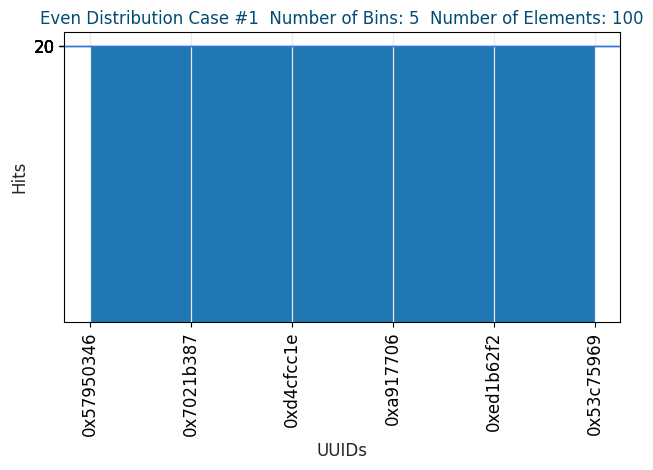

CRC32 distribution counts:  [1. 1. 1. 1. 1.]


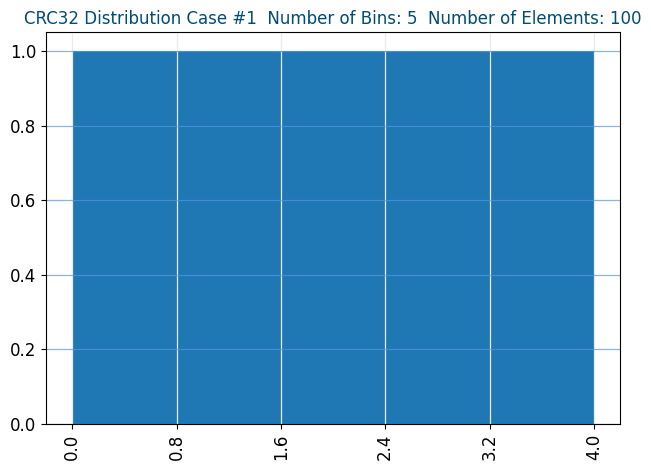

  0 ■■■■■■■■■■         (10)
  1 ■■■■■■■■■■■■■■■    (15)
  2 ■■■■■■■■■■■■■■■■■■ (18)
  3 ■■■■■■■            (7)
  4 ■■■■■■■■■■■        (11)
  5 ■■■■■■■■           (8)
  6 ■■■■■■             (6)
  7 ■■■■■■■■■          (9)
  8 ■■■■■■             (6)
  9 ■■■■■■■■■■         (10)
['0x57950346', '0x65413f8e', '0xd1373b27', '0x49d16156', '0x7611d7b5', '0xda4d1625', '0x9ae87b85', '0xd3eea6dd', '0x80ab94a4', '0xea2647a0', '0x494a4a69', '0xa8002dfb', '0x12bdb76e', '0x172928cf', '0xb4b6fa7', '0x7a2fa339', '0xd2ad5722', '0x4c0a60a1', '0x425ffe16', '0x4c41651e', '0x7021b387', '0x96c17b94', '0xf3d6f4d7', '0xd3ccff15', '0x22c79435', '0xd71879fb', '0x63e90f33', '0x184a688a', '0xb9fb9097', '0x7b240447', '0xcd54d909', '0x44181793', '0x2557ba8a', '0xdbf213c0', '0x2db16910', '0xfecb160', '0x1545c2f0', '0x1c235021', '0xfd065f93', '0x2b3c7e0d', '0xd4cfcc1e', '0xf2363df3', '0xf8d97c1e', '0x3b5d922a', '0x676165c5', '0xb9fa003a', '0x3269a8b3', '0x1364d488', '0x3ba2eeaf', '0x805b7e8d', '0x3c3d30ff', '0xbc746a05'

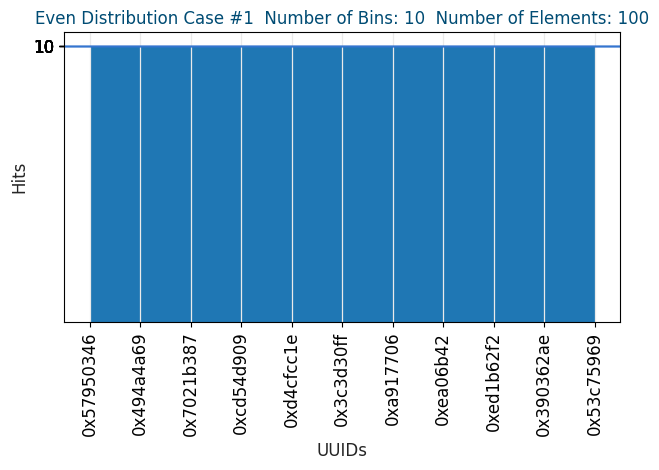

CRC32 distribution counts:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


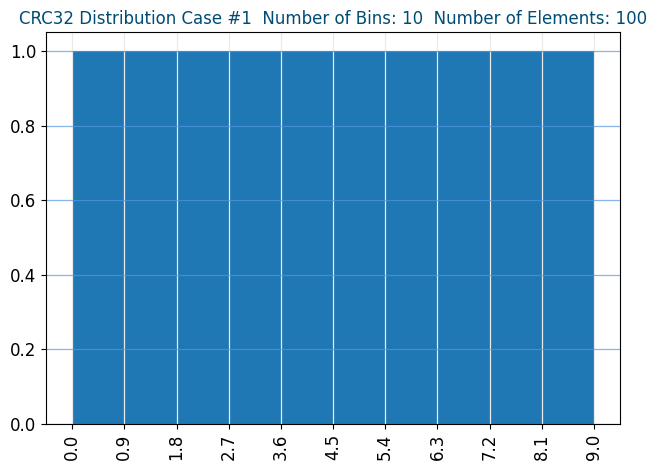

  0 ■          (1)
  1 ■■■■■■■■■  (9)
  2 ■■■■■■■■■■ (10)
  3 ■■         (2)
  4 ■■■■       (4)
  5 ■■■■       (4)
  6 ■■■■■      (5)
  7 ■■■■■■     (6)
  8 ■■         (2)
  9 ■■■■       (4)
 10 ■■■■■■■■■  (9)
 11 ■■■■■■     (6)
 12 ■■■■■■■■   (8)
 13 ■■■■■      (5)
 14 ■■■■■■■    (7)
 15 ■■■■       (4)
 16 ■          (1)
 17 ■■■        (3)
 18 ■■■■       (4)
 19 ■■■■■■     (6)
['0x57950346', '0x65413f8e', '0xd1373b27', '0x49d16156', '0x7611d7b5', '0xda4d1625', '0x9ae87b85', '0xd3eea6dd', '0x80ab94a4', '0xea2647a0', '0x494a4a69', '0xa8002dfb', '0x12bdb76e', '0x172928cf', '0xb4b6fa7', '0x7a2fa339', '0xd2ad5722', '0x4c0a60a1', '0x425ffe16', '0x4c41651e', '0x7021b387', '0x96c17b94', '0xf3d6f4d7', '0xd3ccff15', '0x22c79435', '0xd71879fb', '0x63e90f33', '0x184a688a', '0xb9fb9097', '0x7b240447', '0xcd54d909', '0x44181793', '0x2557ba8a', '0xdbf213c0', '0x2db16910', '0xfecb160', '0x1545c2f0', '0x1c235021', '0xfd065f93', '0x2b3c7e0d', '0xd4cfcc1e', '0xf2363df3', '0xf8d97c1e', '0x3b5d922a', '0x6

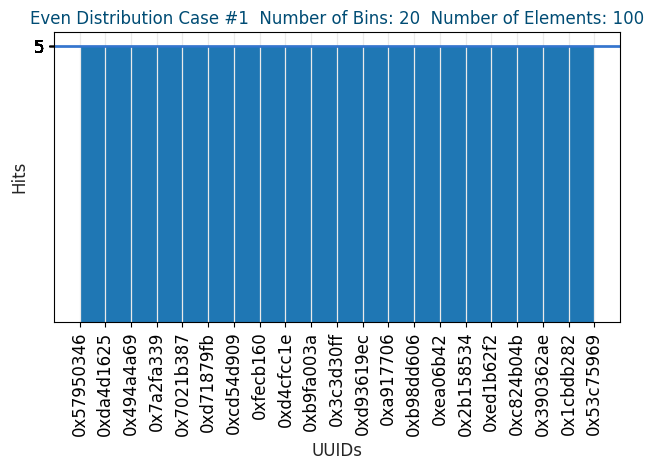

CRC32 distribution counts:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


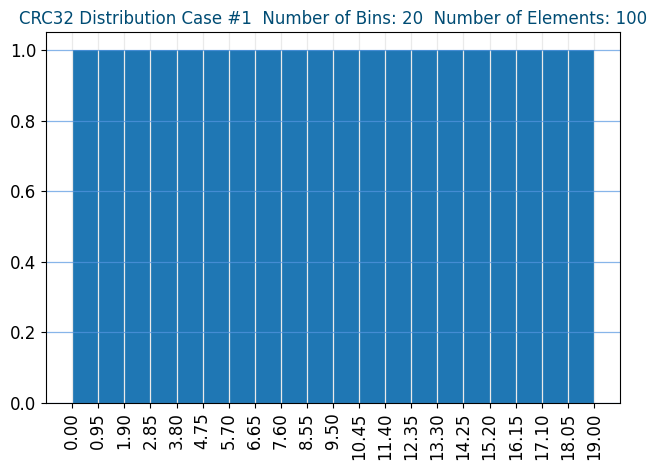

  0 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                                                  (170)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■             (207)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                    (200)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ (219)
  4 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

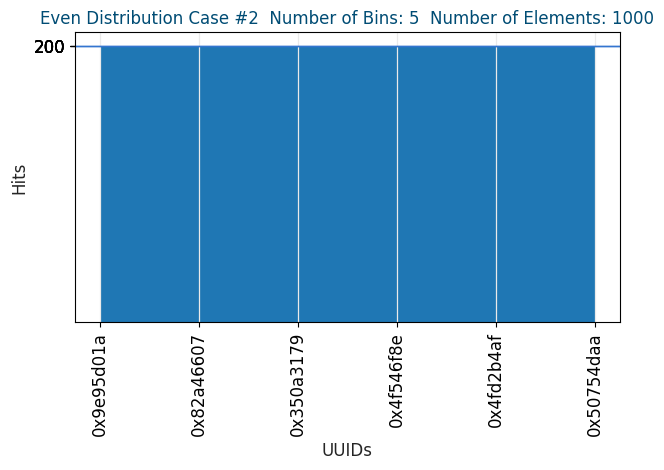

CRC32 distribution counts:  [1. 1. 1. 1. 1.]


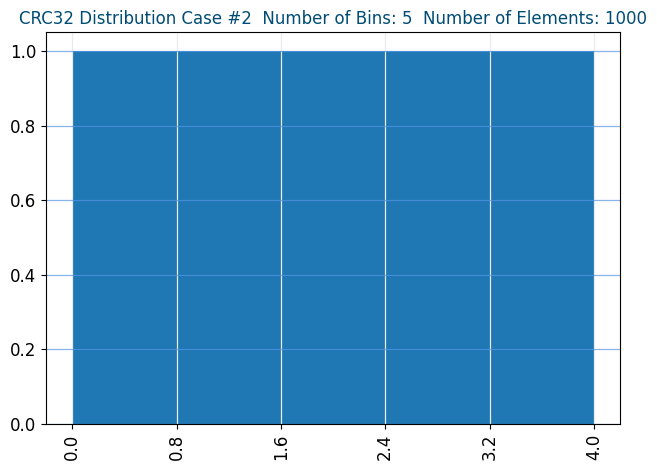

  0 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                         (94)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                        (95)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■            (107)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ (118)
  4 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                     (98)
  5 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                                           (76)
  6 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■       (112)
  7 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■    

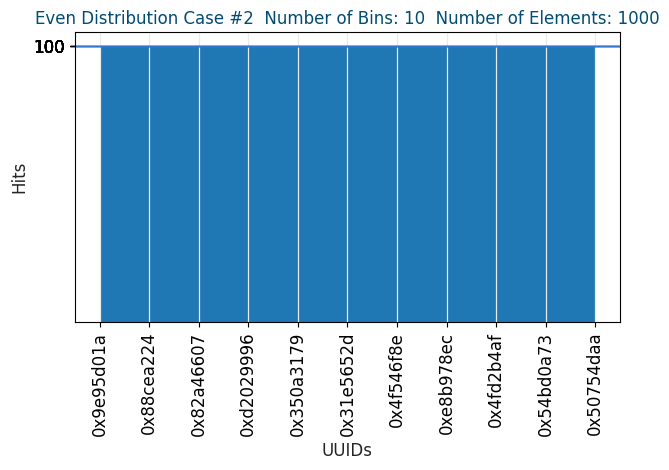

CRC32 distribution counts:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


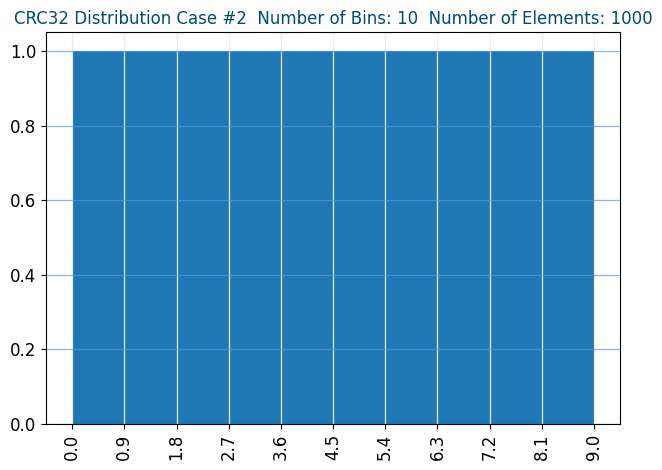

  0 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■               (54)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                  (51)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                         (44)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                   (50)
  4 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                   (50)
  5 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                     (48)
  6 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■            (57)
  7 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                    (49)
  8 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                (53)
  9 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                  (51)
 10 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                             (40)
 11 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■                         (44)
 12 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

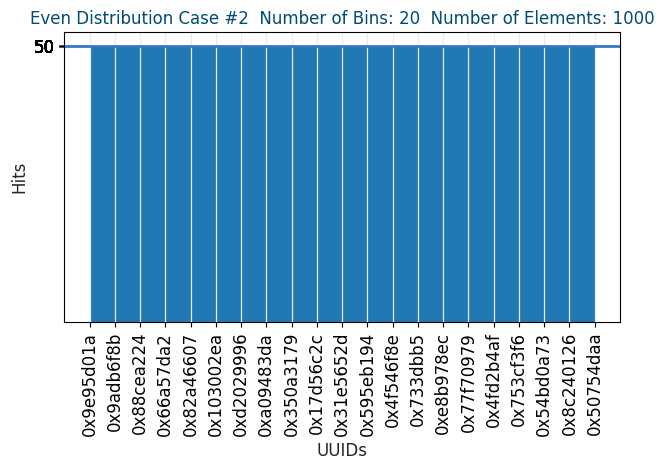

CRC32 distribution counts:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


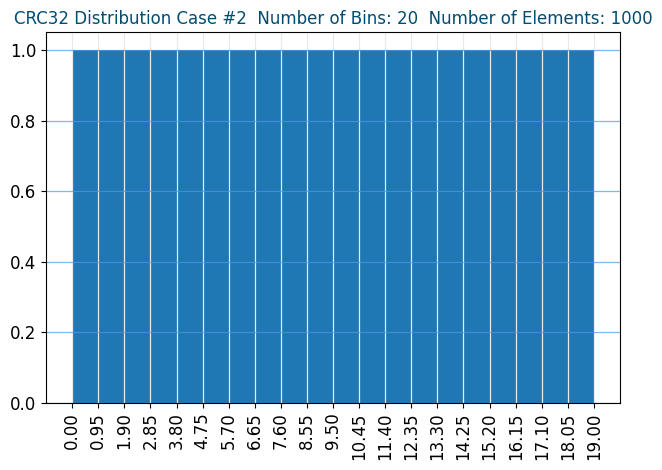

In [274]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
color_bars2 = '#5596E1'
txt_color1 = '#252525'
txt_color2 = '#004C74'

print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        title = f"Case #{idx}  Number of Bins: {bin_size}  Number of Elements: {len(val)}"
        # Using our hash function
        counts = (distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))
        # Plot our counts
        plot(counts)  

        # Convert to hexadecimal
        hex_val = [to_hex(crc32_hash_function(str(i))) for i in val]
        print(hex_val)

        # Theoretical even distribution
        c, b, _ = plt.hist(hex_val, bins=bin_size)
        c = [int(c) for c in c]  # Convert to integers
        print("Distribute counts: ", counts)
        print("Even distribution counts: ", c)
        
        plt.title(f"Even Distribution {title}", c=txt_color2)
        plt.xlabel('UUIDs', fontsize=12, c=txt_color1)
        plt.ylabel('Hits', fontsize=12, c=txt_color1)
        ##plt.axis([0, 1, 0, 1000])

        plt.xticks(b, fontsize=12, rotation='vertical')
        plt.yticks(c, fontsize=12)
        plt.grid(axis='y', color=color_bars, lw = 0.9, alpha=0.7)
        plt.grid(axis='x', color=facecolor, lw = 0.9)
        plt.tight_layout()
        plt.grid(True)
        plt.show()

        c, b, _ = plt.hist(counts, bins=bin_size)
        print("CRC32 distribution counts: ", c)
        plt.title(f"CRC32 Distribution {title}", c=txt_color2)
        plt.xticks(b, fontsize=12, rotation='vertical')
        plt.yticks(fontsize=12)
        plt.grid(axis='y', color=color_bars2, lw = 0.9, alpha=0.7)
        plt.grid(axis='x', color=facecolor, lw = 0.9)
        plt.tight_layout()
        plt.show()
#

In [ ]:
# Test cases
test_cases = [
[str(uuid.uuid4().int) for i in range(100)],   # 100 users
[str(uuid.uuid4().int) for i in range(10000)], # 10k users (client estimation)
[str(uuid.uuid4().int) for i in range(23639)]  # 24k users (our estimation)
]

# Up to 10% of MAUs as bins
num_bins = [5, 10, 50, 100, 850]

# Plot Normal hash function
print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case #{idx}  Number of Bins: {bin_size}  Number of Elements: {len(val)}")
        plot(distribute(val, num_containers=bin_size))  

print("Python crc32 function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case {idx}: Number of Bins: {bin_size}")
        plot(distribute(val, num_containers=bin_size, hash_function=my_hash_function))  

#hc, hb, _ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.xticks(hb, fontsize=12, rotation='vertical')
#plt.show()

#fig = plt.figure(figsize=(22,8))
#hc, hb, _ = plt.hist(test_hash  )  # arguments are passed to np.histogram
#plt.title("UUID Histogram with 'auto' bins")
#plt.xticks(hb, fontsize=12, rotation='vertical')
#plt.yticks(fontsize=12)
#plt.show()

In [ ]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'

#fig = plt.figure(figsize=(22,8))
#n, bins, patches = plt.hist(client_hash, bins=allowed_uuids, color=color_bars)


#remove major and minor ticks from the x axis, but keep the labels
#ax.tick_params(axis='both', which='both',length=0)
# Hide the right and top spines
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_position(('outward', 10))

#plt.axis([0, 1, 0, 1000])

print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        chart_title = f"Case #{idx}  Number of Bins: {bin_size}  Number of Elements: {len(val)}"
        #plot(distribute(val, num_containers=bin_size))  
        #c, b, _ = plt.hist(distribute(val, num_containers=bin_size, hash_function=my_hash_function))
        c, b, _ = plt.hist(val, num_containers=bin_size, hash_function=my_hash_function))

        plt.title(chart_title, c=txt_color2)
        plt.xlabel('UUIDs', fontsize=12, c=txt_color1)
        plt.ylabel('Hits', fontsize=12, c=txt_color1)
        #plt.axis([0, 1, 0, 1000])
        #plt.grid(True)

        plt.xticks(b, c=txt_color1, fontsize=12, rotation='vertical')
        plt.yticks(c=txt_color1, fontsize=12)
        plt.grid(axis='y', color=color_bars, lw = 0.9, alpha=0.7)
        plt.grid(axis='x', color=facecolor, lw = 0.9)
        plt.tight_layout()
        plt.show()
        #count, bins, ignored = plt.hist(distribute(), 16, facecolor='blue') 

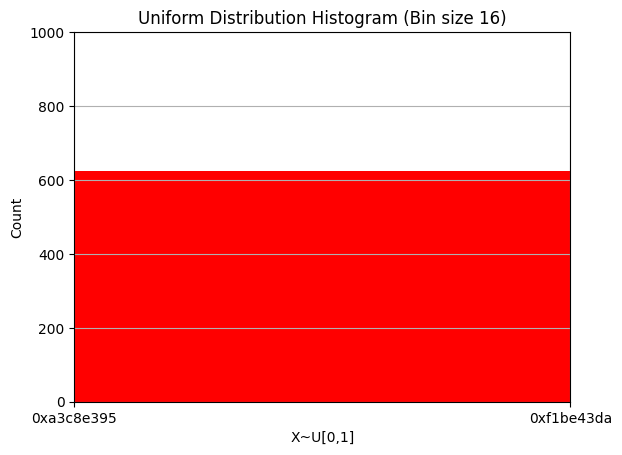

In [56]:

# Using 16 UUIDs
count, bins, ignored = plt.hist(client_hash, 16, facecolor='blue') 
plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution Histogram (Bin size 16)")
plt.axis([0, 1, 0, 1000])
#plt.axis(["","#ffffff", 0, 10])
plt.grid(True)

plt.show(block = False)

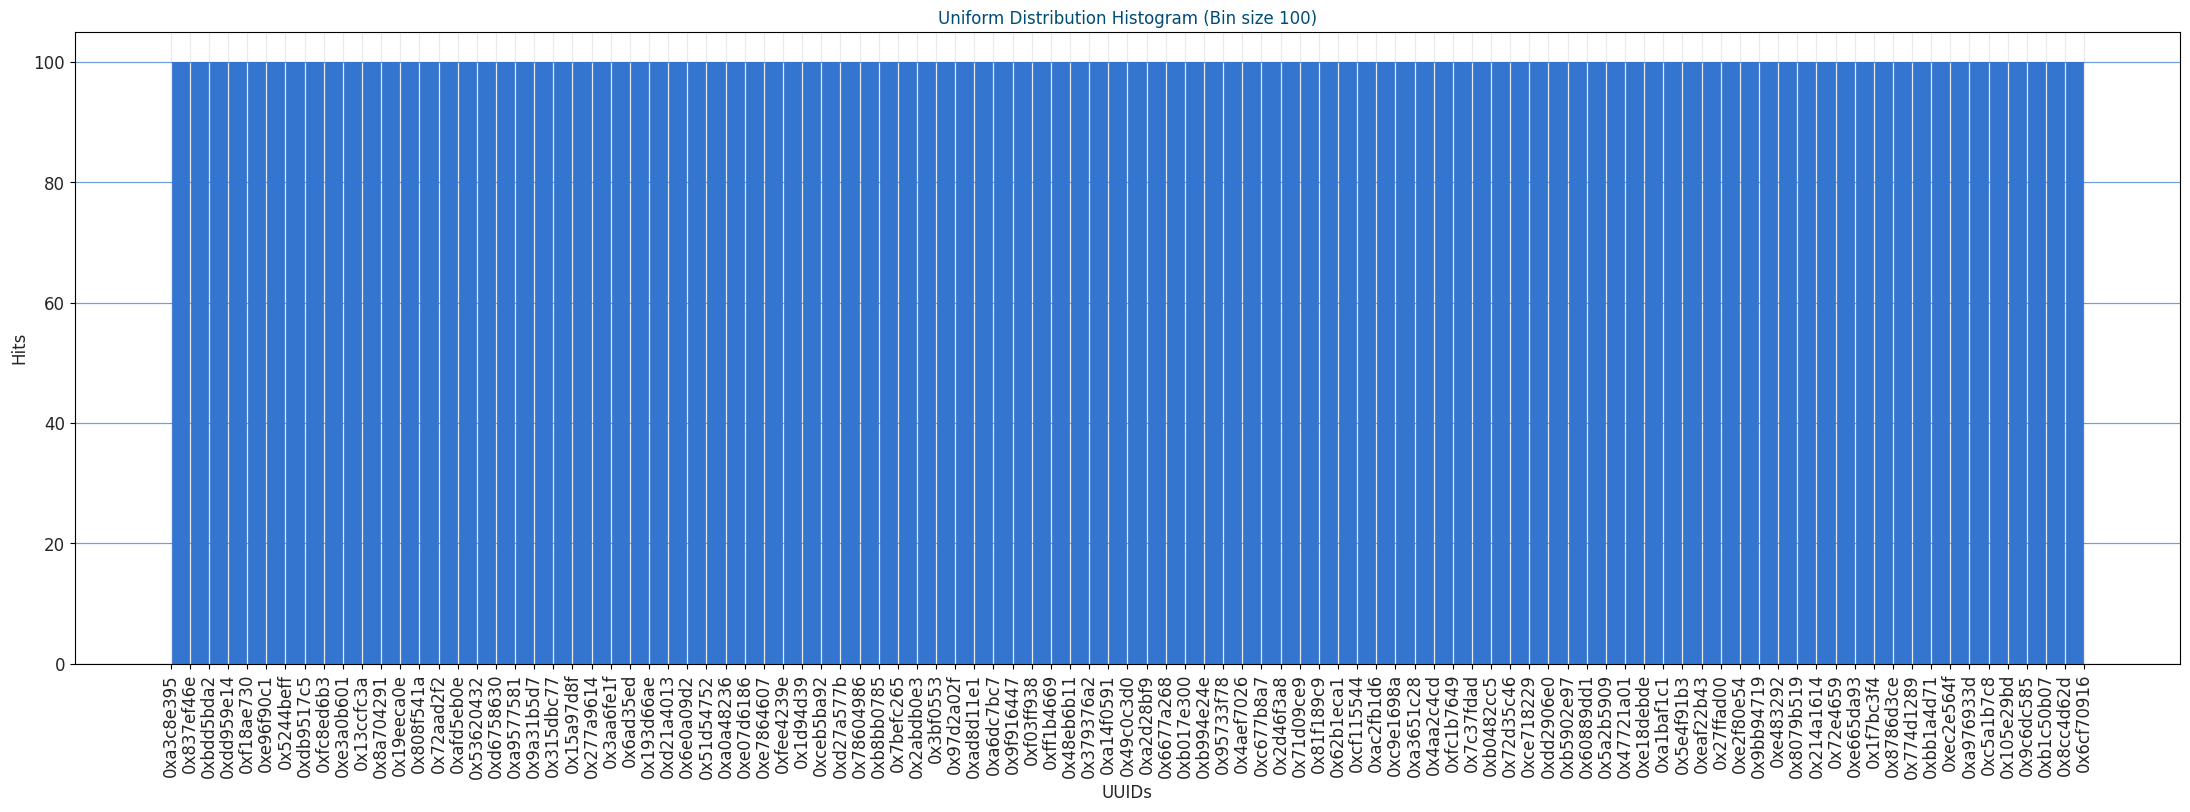

In [84]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'

# How many UUID's are we going to allow the user
# to connect to at the same time.
allowed_uuids = 100  # binsize

# plot it
fig = plt.figure(figsize=(22,8))
n, bins, patches = plt.hist(client_hash, bins=allowed_uuids, color=color_bars)

plt.xlabel('UUIDs', fontsize=12, c=txt_color1)
plt.ylabel('Hits', fontsize=12, c=txt_color1)
#plt.axis([0, 1, 0, 1000])
#plt.grid(True)

plt.xticks(bins, c=txt_color1, fontsize=12, rotation='vertical')
plt.yticks(c=txt_color1, fontsize=12)
plt.grid(axis='y', color=color_bars, lw = 0.9, alpha=0.7)
plt.grid(axis='x', color=facecolor, lw = 0.9)

#remove major and minor ticks from the x axis, but keep the labels
#ax.tick_params(axis='both', which='both',length=0)
# Hide the right and top spines
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_position(('outward', 10))

#plt.axis([0, 1, 0, 1000])
plt.tight_layout()
plt.title(f"Uniform Distribution Histogram (Bin size {allowed_uuids})", c=txt_color2)
plt.show(block = False)
#plt.savefig('hist.png', facecolor=facecolor)

([<matplotlib.axis.XTick at 0x29fd79210>,
 [Text(0.0, 0, '0x5d7f9005'),
  Text(1.98, 0, '0xb72c8de0'),
  Text(3.96, 0, '0x51d66446'),
  Text(5.9399999999999995, 0, '0xfca78677'),
  Text(7.92, 0, '0xda02be1a'),
  Text(9.9, 0, '0x8ff95ef6'),
  Text(11.879999999999999, 0, '0x77ba51f8'),
  Text(13.86, 0, '0x9c37526d'),
  Text(15.84, 0, '0xdd4d7267'),
  Text(17.82, 0, '0xd09eaefd'),
  Text(19.8, 0, '0x6e4baa6d'),
  Text(21.78, 0, '0x3efd2dca'),
  Text(23.759999999999998, 0, '0xb530252b'),
  Text(25.74, 0, '0x4482d984'),
  Text(27.72, 0, '0xa364f95a'),
  Text(29.7, 0, '0x3372abd3'),
  Text(31.68, 0, '0x17a1b1bf'),
  Text(33.66, 0, '0x125186dc'),
  Text(35.64, 0, '0x7f4c6aee'),
  Text(37.62, 0, '0x191fcde'),
  Text(39.6, 0, '0xb44ca066'),
  Text(41.58, 0, '0x3a8538e8'),
  Text(43.56, 0, '0x36fc3024'),
  Text(45.54, 0, '0x23143f78'),
  Text(47.519999999999996, 0, '0xb1fde7d2'),
  Text(49.5, 0, '0x2c0005a'),
  Text(51.48, 0, '0x13527d04'),
  Text(53.46, 0, '0x600f31ae'),
  Text(55.44, 0, '0x316

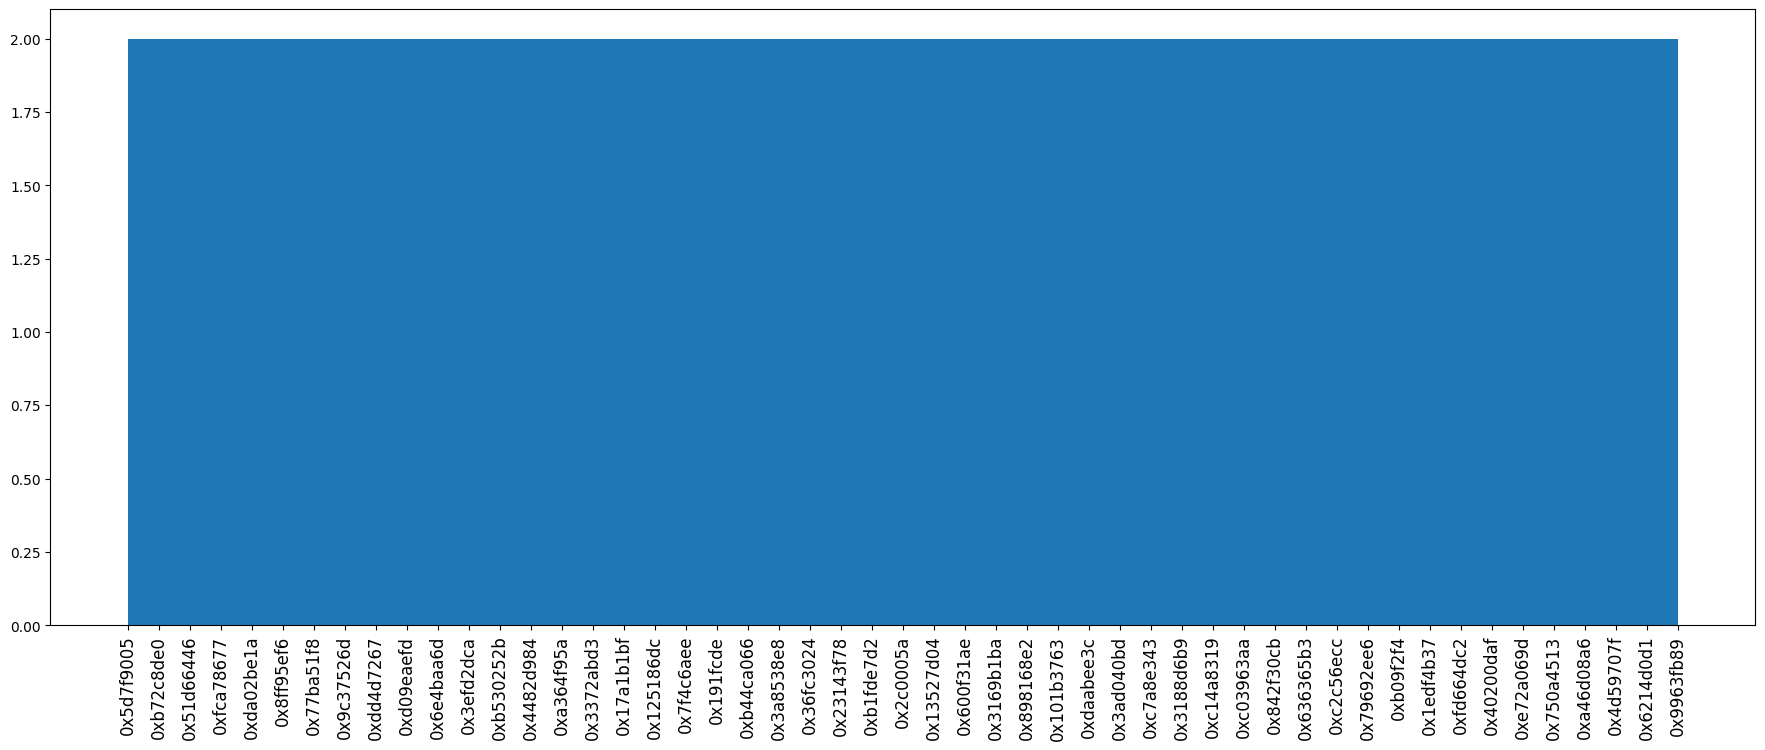

In [187]:
import numpy as np

NUM_EXAMPLES = 10000
SEQ_LENGTH = 10

fig = plt.figure(figsize=(22,8))
hc, hb, _ = plt.hist(test_hash, bins=50, histtype='bar')
plt.xticks(hb, fontsize=12, rotation='vertical')

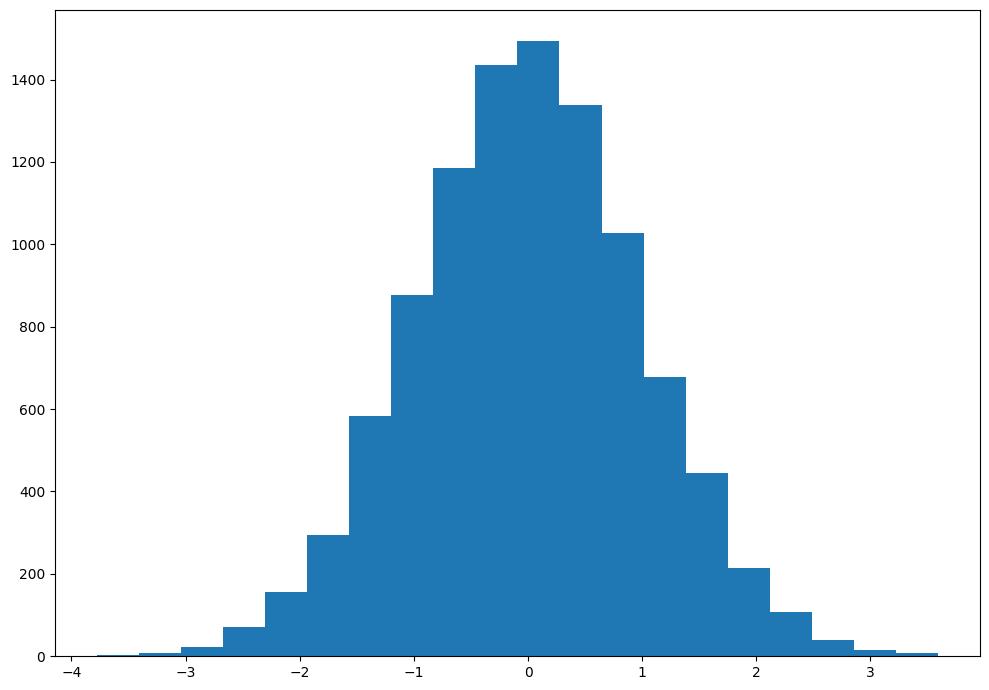

In [83]:
# Creating dataset
np.random.seed(23685752)
N_points = 10000
n_bins = 20
 
# Creating distribution
x = np.random.randn(N_points)
y = .8 ** x + np.random.randn(10000) + 25
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
 
# Show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(0,1000,1000) # You are generating 1000 points between 0 and 1000.
count, bins, ignored = plt.hist(data, 100, facecolor='green') 

plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution Histogram (Bin size 100)")
plt.axis([0, 1000, 0, 50]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)

In [ ]:
# Hashing UUIDs
import zlib

# Create Hash Function
def hash_function(user_id):
    encoded = bytes(user_id, encoding='ascii')
    return hex(zlib.crc32(encoded) & 0xffffffff)

# Test the function
user_id = "GUEST"
uuid_hash = hash_function(user_id)
test_hash = hex(zlib.crc32(b'GUEST') & 0xffffffff)
assert(test_hash == uuid_hash)